<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/Chaotic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generalized Lotka-Volterra system**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

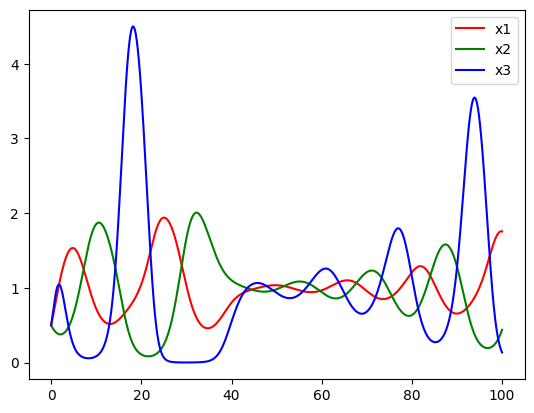

In [ ]:
#@title Statistical analysis of the SIR or SIS model { run: "auto" }


#discrete steps of Euler's methods
h = 0.001; #timestep
T = np.arange(1,100/h);

#parameter of the model
a = 1.5  #@param {type:"slider", min:0, max:10, step:0.1}
A=[[0.5, 0.5, 0.1],[-0.5, -0.1, 0.1], [a, 0.1, 0.1]] #interaction matrix

#Euler's method of the 3-species Lotka-Volterra
res = [] #list of results
x1 = 0.5; x2 = 0.5; x3 = 0.5 #set initial conditions
for t in T:
  delta_x1 = x1*(A[0][0]*(1-x1)+A[0][1]*(1-x2)+A[0][2]*(1-x3))
  delta_x2 = x2*(A[1][0]*(1-x1)+A[1][1]*(1-x2)+A[1][2]*(1-x3))
  delta_x3 = x3*(A[2][0]*(1-x1)+A[2][1]*(1-x2)+A[2][2]*(1-x3))
  x1 += delta_x1*h
  x2 += delta_x2*h
  x3 += delta_x3*h
  res.append((x1,x2,x3))


x1 = 0.5+0.001; x2 = 0.5; x3 = 0.5-0.001 #set initial conditions
res_2 = [] #list of results
for t in T:
  delta_x1 = x1*(A[0][0]*(1-x1)+A[0][1]*(1-x2)+A[0][2]*(1-x3))
  delta_x2 = x2*(A[1][0]*(1-x1)+A[1][1]*(1-x2)+A[1][2]*(1-x3))
  delta_x3 = x3*(A[2][0]*(1-x1)+A[2][1]*(1-x2)+A[2][2]*(1-x3))
  x1 += delta_x1*h
  x2 += delta_x2*h
  x3 += delta_x3*h
  res_2.append((x1,x2,x3))
#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
X1t,X2t,X3t = map(np.array, zip(*res))
X1t2,X2t2,X3t2 = map(np.array, zip(*res_2))

#plot results
fig,ax = plt.subplots()
ax.plot(h*T,np.abs(X1t), 'r', label='x1')
ax.plot(h*T,np.abs(X2t), 'g', label='x2')
ax.plot(h*T,np.abs(X3t), 'b', label='x3')
ax.legend();